In [1]:
# for d in os.listdir("./train"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./train', d)):
#         for f in filenames[:15]:
#             os.remove(os.path.join('./train', d,f))
            
# for d in os.listdir("./test"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./test', d)):
#         for f in filenames[15:]:
#             print(os.path.join('./test', d,f))
#             os.remove(os.path.join('./test', d,f))|
        


In [1]:
!python -V

Python 3.8.10


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
# from tensorflow.python.compiler.mlcompute import mlcompute
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()
# mlcompute.set_mlc_device(device_name='gpu')
# tf.config.run_functions_eagerly(False)
# print(tf.executing_eagerly())

In [7]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

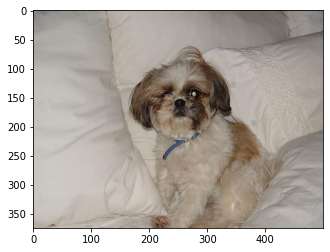

In [8]:
img = mpimg.imread("./images/Images/n02086240-Shih-Tzu/n02086240_9.jpg")
plt.imshow(img)
plt.show()

In [9]:
img_size = 50
TRAINING_DIR = "./images/Images/"
training_datagen = ImageDataGenerator(
    validation_split= 0.1,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    shuffle = True,
    class_mode='categorical',
    batch_size=126,
    subset='training'
)

validation_datagen = ImageDataGenerator(validation_split = 0.1 ,rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    class_mode='categorical',
    batch_size=126,
    subset='validation'
)

Found 18571 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


Found 18571 images belonging to 120 classes.


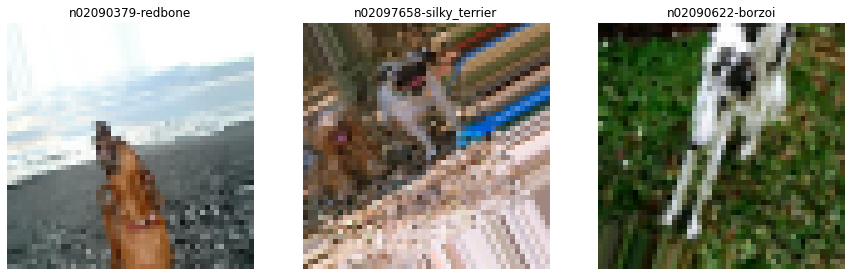

In [11]:
aug_iter = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# mostrar imagenes horizontales
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# obtiene los labels de las clases de flow from directory
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])
# mostrar 3 imagenes
for i in range(3):
    
    obj = next(aug_iter)
    
    # obtenemos el index de cada clase
    class_index = np.argmax(obj[1])
    
    # obtener imagenes del generador
    image = obj[0]

    # mostar 3 imagenes
    ax[i].imshow(image.reshape(img_size, img_size, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

In [12]:
checkpoint_filepath = './vgcc1/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath)

In [13]:
base_model = VGG16(include_top=False,
                  input_shape = (img_size,img_size,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
    
model = tf.keras.models.Sequential([
    base_model,
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50,3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               61560     
Total params: 14,776,248
Trainable params: 61,560
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#model.load_weights(checkpoint_filepath)
history = model.fit(train_generator, epochs=100, steps_per_epoch=10,validation_data = validation_generator, verbose = 1, 
                    validation_steps=3,callbacks=[model_checkpoint_callback])

Epoch 1/100
10/10 [==============================] - 7s 650ms/step - loss: 5.0952 - accuracy: 0.0119 - val_loss: 4.9341 - val_accuracy: 0.0185
INFO:tensorflow:Assets written to: ./vgcc1/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 6s 608ms/step - loss: 4.9676 - accuracy: 0.0063 - val_loss: 4.8520 - val_accuracy: 0.0132
INFO:tensorflow:Assets written to: ./vgcc1/checkpoint/assets
Epoch 3/100
10/10 [==============================] - 6s 629ms/step - loss: 4.8673 - accuracy: 0.0095 - val_loss: 4.8046 - val_accuracy: 0.0132
INFO:tensorflow:Assets written to: ./vgcc1/checkpoint/assets
Epoch 4/100
10/10 [==============================] - 6s 617ms/step - loss: 4.8850 - accuracy: 0.0103 - val_loss: 4.7881 - val_accuracy: 0.0159


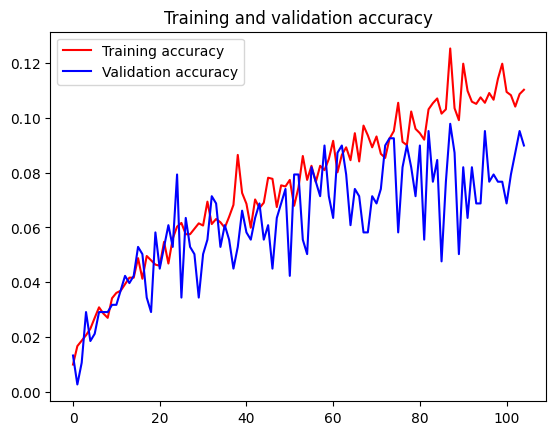

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [10]:
# model_2 = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50,3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(120, activation='softmax')
# ])

# checkpoint_filepath = './tmp/checkpoint2'
# model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath)

# model_2.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [11]:
# history2 = model_2.fit(train_generator, epochs=105, steps_per_epoch=2,validation_data = validation_generator, verbose = 1, validation_steps=3,callbacks=[model_checkpoint_callback2])

Epoch 1/105
2/2 [==============================] - 3s 2s/step - loss: 4.7841 - accuracy: 0.0119 - val_loss: 4.8127 - val_accuracy: 0.0026
INFO:tensorflow:Assets written to: ./tmp/checkpoint2/assets
Epoch 2/105
2/2 [==============================] - 2s 1s/step - loss: 4.8038 - accuracy: 0.0000e+00 - val_loss: 4.7867 - val_accuracy: 0.0079
INFO:tensorflow:Assets written to: ./tmp/checkpoint2/assets
Epoch 3/105
2/2 [==============================] - 2s 1s/step - loss: 4.7870 - accuracy: 0.0040 - val_loss: 4.7855 - val_accuracy: 0.0132
INFO:tensorflow:Assets written to: ./tmp/checkpoint2/assets
Epoch 4/105
2/2 [==============================] - 2s 1s/step - loss: 4.7861 - accuracy: 0.0119 - val_loss: 4.7882 - val_accuracy: 0.0132
INFO:tensorflow:Assets written to: ./tmp/checkpoint2/assets
Epoch 5/105
2/2 [==============================] - 2s 1s/step - loss: 4.7782 - accuracy: 0.0317 - val_loss: 4.8274 - val_accuracy: 0.0053
INFO:tensorflow:Assets written to: ./tmp/checkpoint2/assets
Epoch 

KeyboardInterrupt: 

In [13]:
# model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

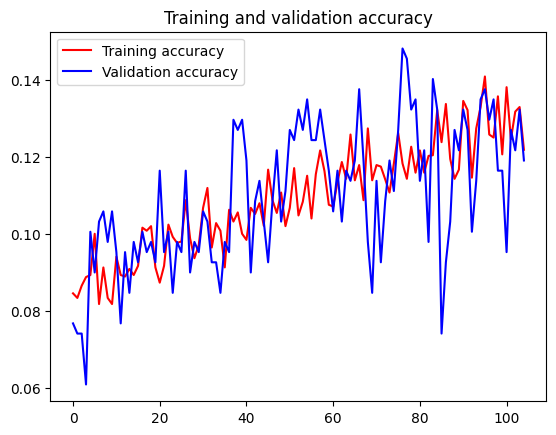

<Figure size 640x480 with 0 Axes>

In [20]:
# import matplotlib.pyplot as plt
# acc = history2.history['accuracy']
# val_acc = history2.history['val_accuracy']
# loss = history2.history['loss']
# val_loss = history2.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()